<img src='img/601.jpg'>

In [130]:
import numpy as np
import os
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

<img src='img/602.jpg'>
<img src='img/603.jpg'>

In [324]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X, y = make_moons(noise=0.30, random_state=42, n_samples=500)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

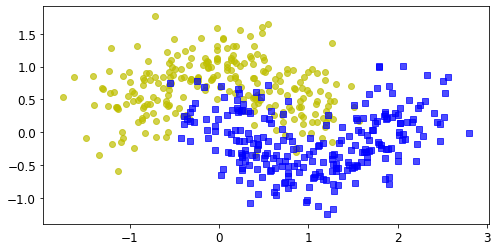

In [325]:
plt.figure(figsize=(8, 4))
plt.plot(X[y == 0, 0], X[y == 0, 1], 'yo', alpha=0.7)
plt.plot(X[y == 1, 0], X[y == 1, 1], 'bs', alpha=0.7)


### 硬投票实验
- 少数服从多数

In [133]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rdf_clf = RandomForestClassifier()
svc_clf = SVC()
voting_clf = VotingClassifier(estimators=[('lr',log_clf),('rf',rdf_clf),('svc',svc_clf)],voting='hard')

In [134]:
from sklearn.metrics import accuracy_score
for clf in (log_clf,rdf_clf,svc_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))


LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.904


### 软投票实验
- 对各个概率值进行加权平均

In [135]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(random_state=42)
rdf_clf = RandomForestClassifier(random_state=42)
svc_clf = SVC(probability=True,random_state=42)
voting_clf = VotingClassifier(estimators=[('lr',log_clf),('rf',rdf_clf),('svc',svc_clf)],voting='soft')

In [136]:
from sklearn.metrics import accuracy_score
for clf in (log_clf,rdf_clf,svc_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))


LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92


<img src='img/604.jpg'>

In [137]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                n_estimators=500,
                max_samples=100,
                bootstrap=True,
                n_jobs=-1,
                random_state=42
                )
bag_clf.fit(X_train,y_train)
y_pred_bag = bag_clf.predict(X_test)
accuracy_score(y_test,y_pred_bag)

0.904

In [138]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train,y_train)
y_pred_tree = tree_clf.predict(X_test)
accuracy_score(y_test,y_pred_tree)

0.856

In [139]:
# meshgrid(列,行)
x00,x01 = np.meshgrid(np.linspace(1,3,2).reshape(-1,1),np.linspace(10,20,3).reshape(-1,1))

In [140]:
x00.shape

(3, 2)

In [141]:
x01

array([[10., 10.],
       [15., 15.],
       [20., 20.]])

In [142]:
X_new_0 = np.c_[x00.ravel(), x01.ravel()]
X_new_0.shape

(6, 2)

### 决策边界
- 集成与传统方法对比

In [143]:
from matplotlib.colors import ListedColormap
def plot_decision_boundaries(clf, X, y, axes=[-2, 3, -1.5, 2], alpha=0.7, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s,x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap1 = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1,x2,y_pred,cmap=custom_cmap1,alpha=0.3)

    if contour:
        custom_cmap = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1,x2,y_pred,cmap=custom_cmap,alpha=0.8)
    plt.plot(X[y == 0, 0], X[y == 0, 1], 'yo', alpha=0.5)
    plt.plot(X[y == 1, 0], X[y == 1, 1], 'bs', alpha=0.5)
    # plt.axes(axes)
    plt.xlabel('x1')
    plt.ylabel('x2')

Text(0.5, 1.0, 'Decision Tree With Bagging')

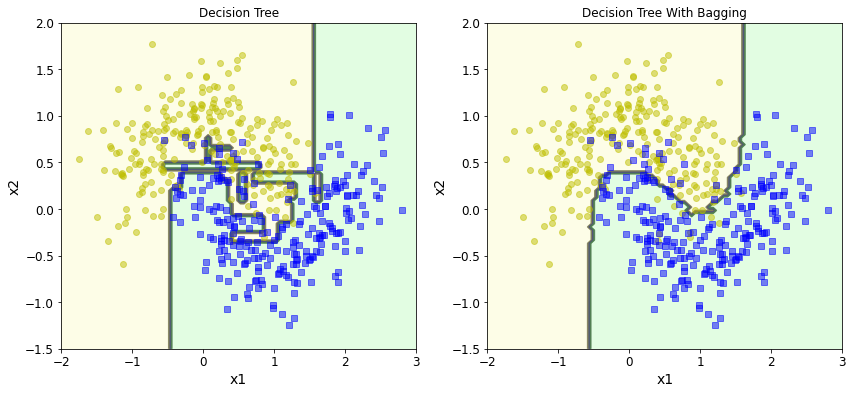

In [144]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_decision_boundaries(tree_clf,X,y)
plt.title('Decision Tree')
plt.subplot(122)
plot_decision_boundaries(bag_clf,X,y)
plt.title('Decision Tree With Bagging')

### OOB策略
- Out Of Bag 袋外数据

In [145]:
bag_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                n_estimators=500,
                max_samples=100,
                bootstrap=True,
                n_jobs=-1,
                random_state=42,
                oob_score=True
                )
bag_clf.fit(X_train,y_train)
# 验证集的准确率
bag_clf.oob_score_

0.9253333333333333

#### 一般来讲, 验证集的准确率会比测试集的准确率高

In [146]:
y_pred_bag = bag_clf.predict(X_test)
accuracy_score(y_test,y_pred_bag)

0.904

In [147]:
bag_clf.oob_decision_function_

array([[0.35579515, 0.64420485],
       [0.43513514, 0.56486486],
       [1.        , 0.        ],
       [0.01030928, 0.98969072],
       [0.03174603, 0.96825397],
       [0.07672634, 0.92327366],
       [0.39189189, 0.60810811],
       [0.06145251, 0.93854749],
       [0.92689295, 0.07310705],
       [0.88205128, 0.11794872],
       [0.59850374, 0.40149626],
       [0.04896907, 0.95103093],
       [0.7565445 , 0.2434555 ],
       [0.81377551, 0.18622449],
       [0.88528678, 0.11471322],
       [0.07407407, 0.92592593],
       [0.04738155, 0.95261845],
       [0.92051282, 0.07948718],
       [0.69974555, 0.30025445],
       [0.94358974, 0.05641026],
       [0.06100796, 0.93899204],
       [0.224     , 0.776     ],
       [0.9125964 , 0.0874036 ],
       [0.98746867, 0.01253133],
       [0.95967742, 0.04032258],
       [0.        , 1.        ],
       [0.94255875, 0.05744125],
       [1.        , 0.        ],
       [0.03466667, 0.96533333],
       [0.7020202 , 0.2979798 ],
       [0.

### 随机森林, Bagging算法中的杰出代表
- 特征的重要性

In [148]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

iris = load_iris()
# list(iris.keys())
rnd_clf = RandomForestClassifier(n_estimators=500,n_jobs=-1)
rnd_clf.fit(iris.data,iris.target)
for name, score in zip(iris.feature_names, rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11231208942639098
sepal width (cm) 0.022680976803169977
petal length (cm) 0.4245595639552217
petal width (cm) 0.44044736981521737


### mnist中哪些特征比较重要

In [149]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

In [150]:
# 28*28*1
X.shape

(70000, 784)

In [151]:
y.shape

(70000,)

In [152]:
rnd_clf = RandomForestClassifier(n_estimators=500,n_jobs=-1)
rnd_clf.fit(X,y)

RandomForestClassifier(n_estimators=500, n_jobs=-1)

In [153]:
rnd_clf.feature_importances_.shape

(784,)

In [154]:
import matplotlib.cm
def plot_digit(data):
    image = data.reshape(28,28)
    plt.imshow(image,cmap=matplotlib.cm.hot)
    plt.axis('off')
    char = plt.colorbar(ticks=[data.min(),data.max()])
    char.ax.set_yticklabels(['Not Important','Very Important'])


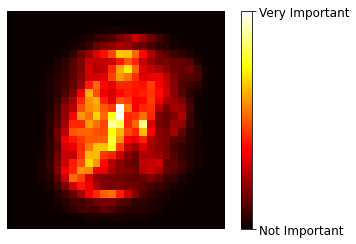

In [155]:
plot_digit(rnd_clf.feature_importances_)

<img src='img/605.jpg'>
<img src='img/606.jpg'>

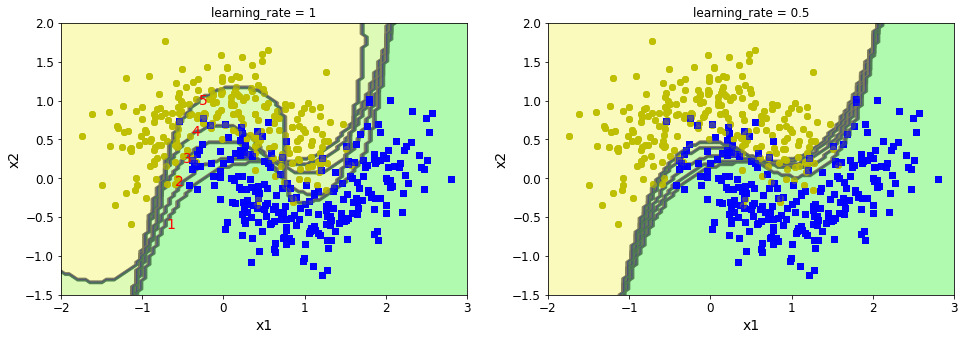

In [161]:
from sklearn.svm import SVC

m = len(X_train)
plt.figure(figsize=(16,5))
for subplot, learning_rate in ((121,1),(122,0.5)):
    plt.subplot(subplot)
    sample_weights = np.ones(m)
    for i in range(5):
        svc_clf = SVC(C=0.05,kernel='rbf',random_state=42)
        svc_clf.fit(X_train, y_train, sample_weight=sample_weights)
        y_pred = svc_clf.predict(X_train)
        sample_weights[y_pred != y_train] *= (1+learning_rate)
        plot_decision_boundaries(svc_clf,X,y,alpha=0.3)
        plt.title('learning_rate = {}'.format(learning_rate))
    if subplot == 121:
        plt.text(-0.7,-0.65,'1',fontsize=14 , color='r')
        plt.text(-0.6,-0.10,'2',fontsize=14, color='r')
        plt.text(-0.5,0.20,'3',fontsize=14, color='r')
        plt.text(-0.4,0.55,'4',fontsize=14, color='r')
        plt.text(-0.3,0.95,'5',fontsize=14, color='r')

In [162]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
                            base_estimator=DecisionTreeClassifier(max_depth=1),
                            n_estimators=200,
                            learning_rate=1,
                            random_state=42
                            )
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1, n_estimators=200, random_state=42)

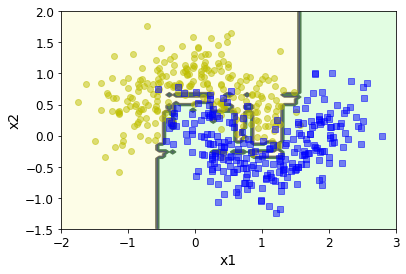

In [163]:
plot_decision_boundaries(ada_clf,X,y)

### Gradient Boosting
- GBDT 第一代
- Xgboost 第二代
- LightGBM 第三代
- 下面是实现GBDT最基本的思想

(-3.0, 3.0, 0.0, 15.0)

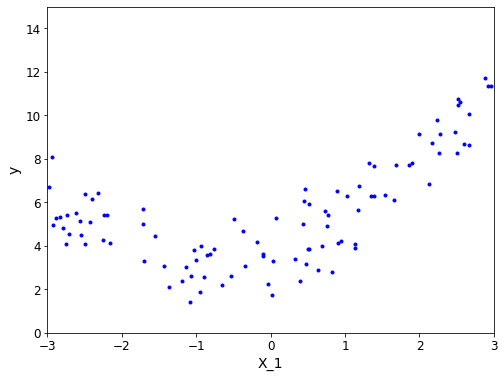

In [295]:
m = 100
X = 6*np.random.rand(m,1) - 3
y = 4 + X + 0.5*X**2 + np.random.randn(m,1) 
plt.figure(figsize=(8,6))
plt.plot(X,y,'b.')
plt.xlabel('X_1')
plt.ylabel('y')
plt.axis([-3,3,0,15])

In [296]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=3,random_state=42)
tree_reg1.fit(X,y)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [297]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y,tree_reg1.predict(X))

0.8184448782708763

In [298]:
y2 = y - tree_reg1.predict(X).reshape(-1,1)
tree_reg2 = DecisionTreeRegressor(max_depth=3,random_state=42)
tree_reg2.fit(X,y2)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [299]:
y3 = y2 - tree_reg2.predict(X).reshape(-1,1)
tree_reg3 = DecisionTreeRegressor(max_depth=3,random_state=42)
tree_reg3.fit(X,y3)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [300]:
X_new = np.array([[0.8]])
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1,tree_reg2,tree_reg3))
y_pred

array([4.77234477])

In [301]:
y_pred = sum(tree.predict(X) for tree in (tree_reg1,tree_reg2,tree_reg3))
mean_squared_error(y,y_pred.reshape(-1,1))

0.5779939231386156

In [302]:
from sklearn.ensemble import GradientBoostingRegressor
gbdt_reg = GradientBoostingRegressor(
                                    n_estimators=100,
                                    max_depth=2,
                                    learning_rate=0.05,
                                    random_state=42
                                    )
gbdt_reg.fit(X,y)

GradientBoostingRegressor(learning_rate=0.05, max_depth=2, random_state=42)

### 提前停止策略
- 不一定是迭代的次数越多, 模型的结果就越好, 我们会在8w,9w,10w分别保存一下模型

In [322]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
gbdt_reg = GradientBoostingRegressor(
                                    n_estimators=200,
                                    max_depth=2,
                                    learning_rate=0.1,
                                    random_state=42
                                    )
gbdt_reg.fit(X_train,y_train)

errors = [mean_squared_error(y_test,y_pred) for y_pred in gbdt_reg.staged_predict(X_test)]
bst_n_estimator = np.argmin(errors)

In [323]:
print(np.min(errors), bst_n_estimator)

1.4388868455384536 26


In [306]:
gbdt_reg_bst = GradientBoostingRegressor(
                                    n_estimators=bst_n_estimator,
                                    max_depth=2,
                                    learning_rate=0.1,
                                    random_state=42
                                    )
gbdt_reg_bst.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=26, random_state=42)

(-3.0, 3.0, 0.0, 15.0)

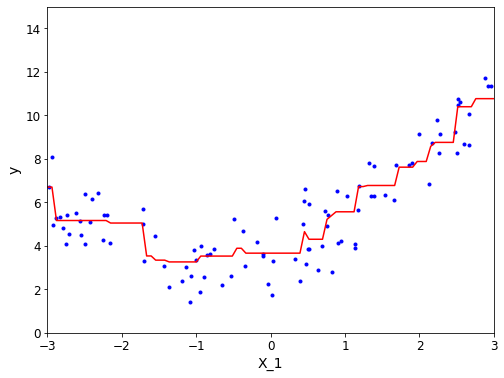

In [321]:
X_new = np.linspace(-3,3,100).reshape(-1,1)
y_pred = gbdt_reg_bst.predict(X_new)
plt.figure(figsize=(8,6))
plt.plot(X,y,'b.')
plt.plot(X_new,y_pred,'r-')
plt.xlabel('X_1')
plt.ylabel('y')
plt.axis([-3,3,0,15])

In [308]:
gbdt_reg_bst = GradientBoostingRegressor(
                                    warm_start=True,
                                    max_depth=2,
                                    learning_rate=0.1,
                                    random_state=42
                                    )
min_val_error = float('inf')
error_going_up = 0
for n_estimators in range(1,120):
    gbdt_reg_bst.n_estimators = n_estimators
    gbdt_reg_bst.fit(X_train,y_train)
    y_pred = gbdt_reg_bst.predict(X_test)
    error = mean_squared_error(y_test,y_pred)
    if error < min_val_error:
        min_val_error = error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break

    

In [312]:
print(min_val_error,gbdt_reg_bst.n_estimators-6)

1.4388868455384536 26


<img src='img/607.jpg'>
<img src='img/608.jpg'>

### Stacking的基本思想实现

In [318]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

In [319]:
rf_clf = RandomForestClassifier(random_state=42)
et_clf = ExtraTreesClassifier(random_state=42)
svm_clf = LinearSVC(random_state=42)
mlp_clf = MLPClassifier(random_state=42)

estimators = [rf_clf, et_clf, svm_clf, mlp_clf]

In [326]:
X, y = make_moons(noise=0.30, random_state=42, n_samples=500)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [327]:
for estimator in estimators:
    print('Training the', estimator)
    estimator.fit(X_train,y_train)

Training the RandomForestClassifier(random_state=42)
Training the ExtraTreesClassifier(random_state=42)
Training the LinearSVC(random_state=42)
Training the MLPClassifier(random_state=42)


In [330]:
X_val_predictions = np.empty([len(X_test),len(estimators)],dtype=np.float32)

for index, estimator in enumerate(estimators):
    X_val_predictions[:,index] = estimator.predict(X_test)

X_val_predictions

array([[1., 1., 1., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [1., 0., 1., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],


In [331]:
random_clf = RandomForestClassifier(n_estimators=200,oob_score=True,random_state=42)
random_clf.fit(X_val_predictions,y_test)

RandomForestClassifier(n_estimators=200, oob_score=True, random_state=42)

In [332]:
random_clf.oob_score_

0.896